# Preparation

in this section, program will import required library and load the dataset

In [26]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.set()
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the dataset
stroke_data = pd.read_csv('../data/health_data.csv')

# Remove column diabetes and hypertension as we don't need it
stroke_data = stroke_data.drop(columns=['Diabetes', 'Hypertension'])

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0


# Data Comprehension

In this section, we will see general information about the dataset

In [ ]:
# Get first 5 data in the dataset
stroke_data.head()

In [4]:
# Get data type and non-null data count for each column
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
# Get information about statistical data of each column
stroke_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


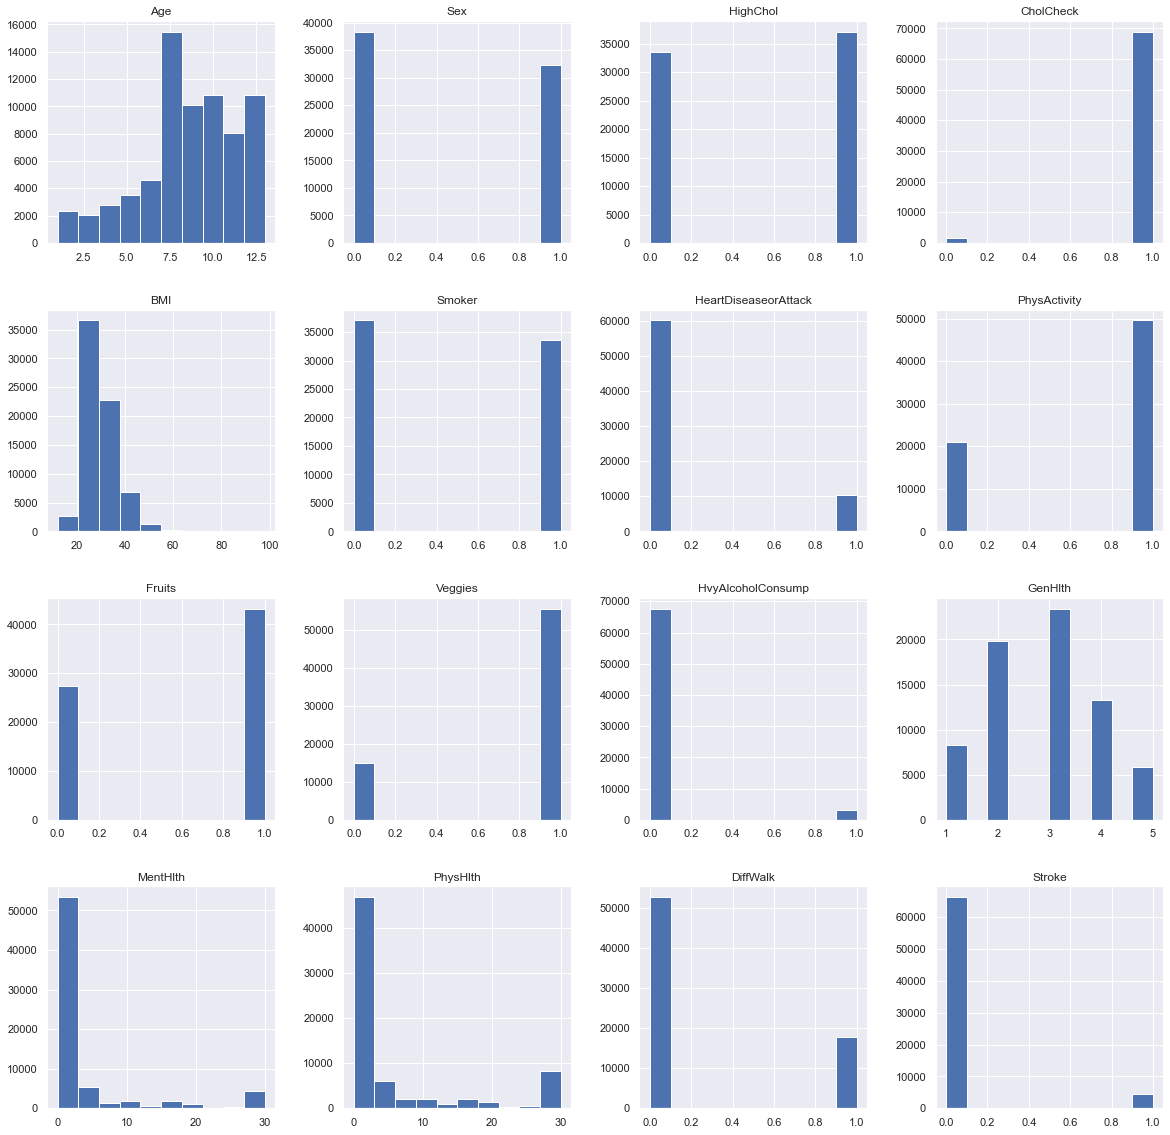

In [6]:
# Draw histogram plot for each column
p = stroke_data.hist(figsize=(20, 20))

In [7]:
# Get dataframe shape
stroke_data.shape

(70692, 16)

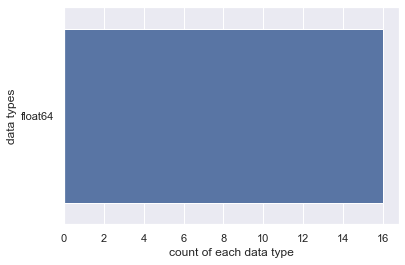

In [8]:
# Get count of each of data type in the dataframe
sns.countplot(y=stroke_data.dtypes ,data=stroke_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

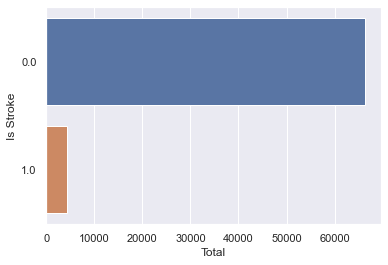

In [9]:
# Get total of each class in output column
sns.countplot(y='Stroke' ,data=stroke_data)
plt.xlabel("Total")
plt.ylabel("Is Stroke")
plt.show()

# Feature Selection

In this section, we will select 6 features with most correlation to target variable

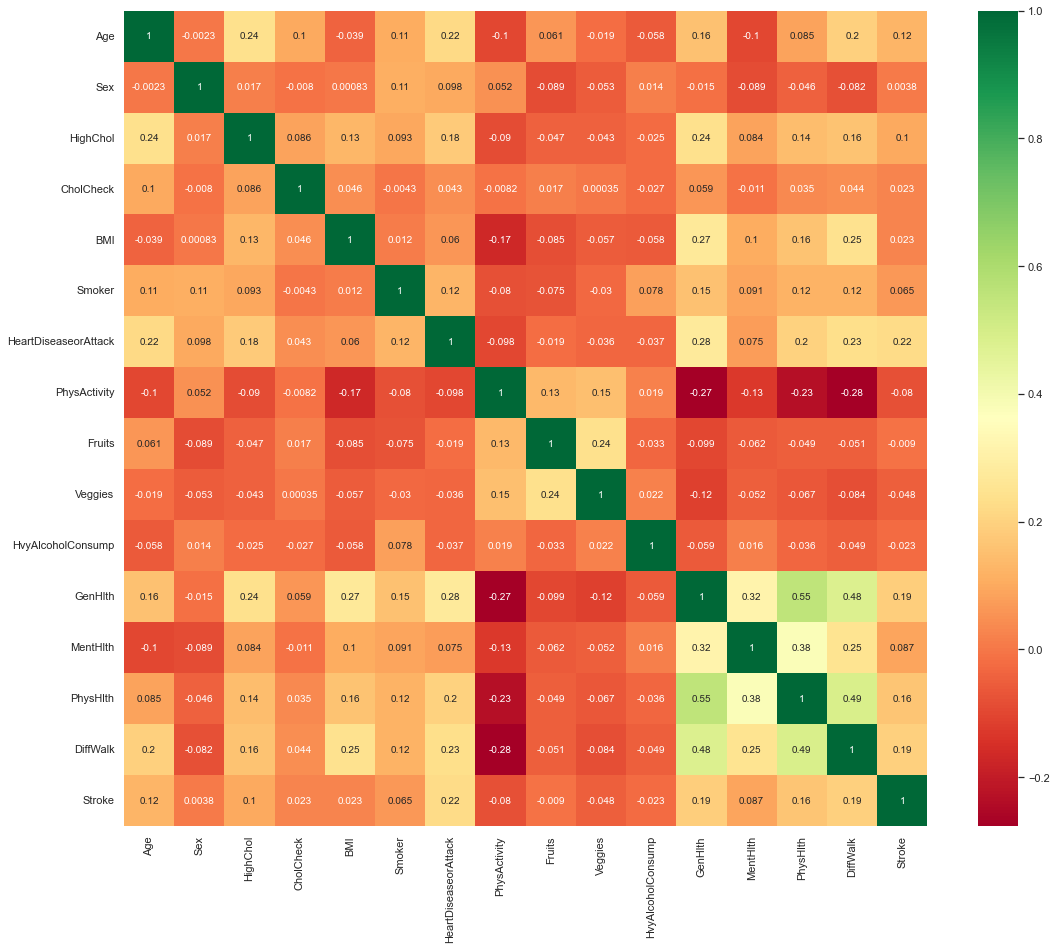

In [10]:
# Heatmap to find data correlation, especially between each column with stroke
plt.figure(figsize=(18,15))
p=sns.heatmap(stroke_data.corr(), annot=True,cmap ='RdYlGn')

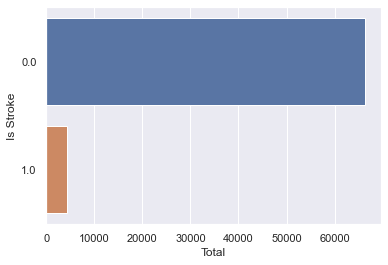

In [11]:
# Get total of each class in target variable
sns.countplot(y='Stroke' ,data=stroke_data)
plt.xlabel("Total")
plt.ylabel("Is Stroke")
plt.show()

In [ ]:
X = stroke_data.loc[:,['Age', 'HighChol', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk']]
y = stroke_data['Stroke']

# Data Balancing

In this section, we will oversampling the minority class

In [12]:
oversample = SMOTENC([1, 2, 3, 4, 5], random_state=1248)
X, y = oversample.fit_resample(X, y)

stroke_data = pd.concat([X, y], axis=1)
stroke_data.head()

,Age,HighChol,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Stroke
0,4.0,0.0,0.0,3.0,30.0,0.0,0.0
1,12.0,1.0,0.0,3.0,0.0,0.0,1.0
2,13.0,0.0,0.0,1.0,10.0,0.0,0.0
3,11.0,1.0,0.0,3.0,3.0,0.0,0.0
4,8.0,0.0,0.0,2.0,0.0,0.0,0.0


# Exploratory Data Analysis

In this section, we will explore dataset and its feature

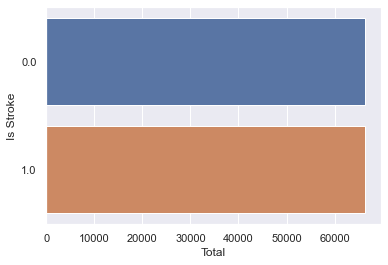

In [13]:
# Get total of each class in target variable
sns.countplot(y='Stroke' ,data=stroke_data)
plt.xlabel("Total")
plt.ylabel("Is Stroke")
plt.show()

In [14]:
def showStrokePercentage(ax):
    for i in range(len(ax.containers[0].patches)):
        firstPatches = ax.containers[0].patches[i]
        secondPatches = ax.containers[1].patches[i]
        num = firstPatches.get_height() / (firstPatches.get_height() + secondPatches.get_height())

        x = firstPatches.get_x()
        y = firstPatches.get_y()
        width = firstPatches.get_width()
        height = firstPatches.get_height()

        ax.text(x + width/2, y + height + 200, "{0:.2%}".format(num), ha='center')

def showTotal(ax):
    for i in range(len(ax.containers[0].patches)):
        firstPatches = ax.containers[0].patches[i]
        secondPatches = ax.containers[1].patches[i]
        num = firstPatches.get_height() + secondPatches.get_height()

        x = firstPatches.get_x()
        width = firstPatches.get_width()
        height = secondPatches.get_height()

        ax.text(x + width/2, height + 200, num, ha='center')

def showStrokePercentageCount(ax):
    for i in range(len(ax.containers[1].patches)):
        firstPatches = ax.containers[1].patches[i]
        secondPatches = ax.containers[0].patches[i]
        num = firstPatches.get_height() / (firstPatches.get_height() + secondPatches.get_height())

        x = firstPatches.get_x()
        y = firstPatches.get_y()
        width = firstPatches.get_width()
        height = firstPatches.get_height()

        ax.text(x + width/2, y + height + 200, "{0:.2%}".format(num), ha='center')

def showTotalCount(ax):
    ax.bar_label(ax.containers[0])

def stackedCount(ax):
    max_height = max([sum([ax.containers[i].patches[j].get_height() for i in range(len(ax.containers))]) for j in range(len(ax.containers[0].patches))])
    ax.set_ylim(ymax=max_height * 1.1)

    for i in range(len(ax.containers[0].patches)):
        ax.containers[0].patches[i].set_y(ax.containers[1].patches[i].get_height())

def showHistPlot(data, x, hue='Stroke', bins=10, isShowStrokePercentage=True, isShowTotal=False):
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.histplot(data, x=x, hue=hue, multiple='stack', bins=bins, ax=ax)
    if isShowStrokePercentage : showStrokePercentage(ax)
    if isShowTotal: showTotal(ax)

def showCountPlot(data, x, hue='Stroke', isStacked=True, isShowStrokePercentage=True, isShowTotal=True):
    plt.subplots(figsize=(10,10))
    ax = sns.countplot(data, x=x,
                       hue=hue, dodge=(not isStacked)
                       )
    if isStacked : stackedCount(ax)
    if isShowStrokePercentage : showStrokePercentageCount(ax)
    if isShowTotal : showTotalCount(ax)

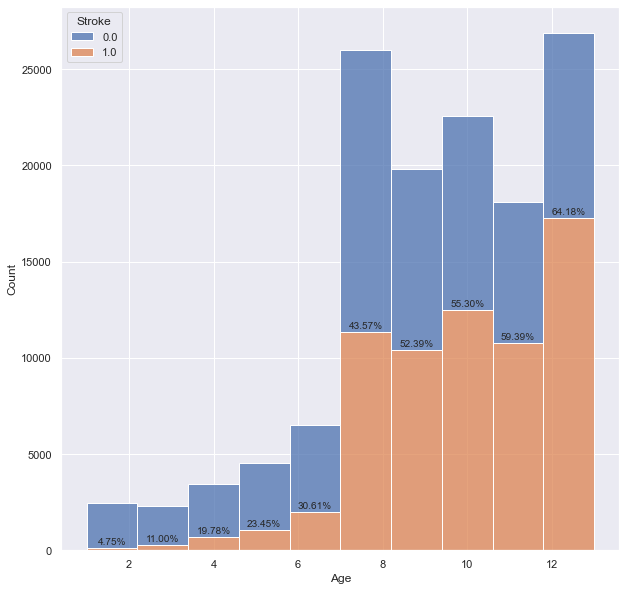

In [15]:
# 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or olde
showHistPlot(stroke_data, 'Age')

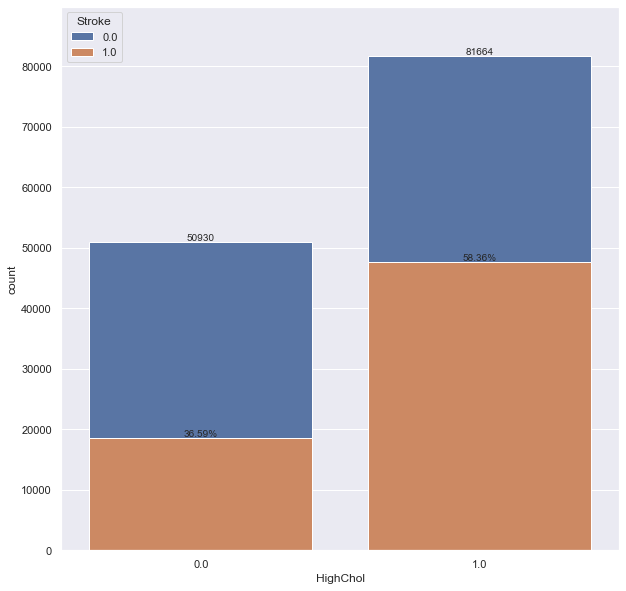

In [16]:
# 0 = no high cholesterol
# 1 = high cholesterol
showCountPlot(stroke_data, 'HighChol')

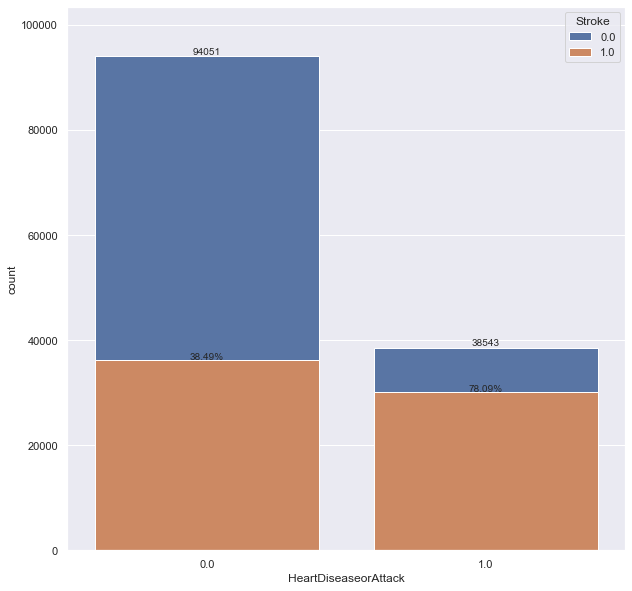

In [17]:
# coronary heart disease (CHD) or myocardial infarction (MI)
# 0 = no
# 1 = yes
showCountPlot(stroke_data, 'HeartDiseaseorAttack')

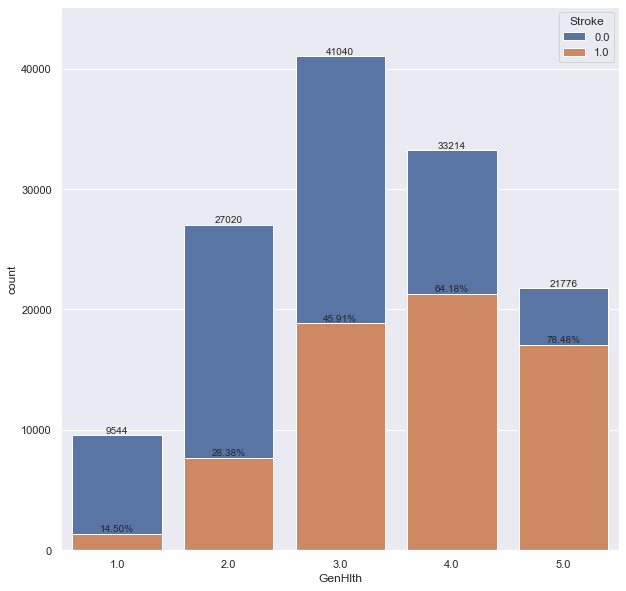

In [18]:
# Would you say that in general your health is: (scale 1-5)
# 1 = excellent
# 2 = very good
# 3 = good
# 4 = fair
# 5 = poor
showCountPlot(stroke_data, 'GenHlth')

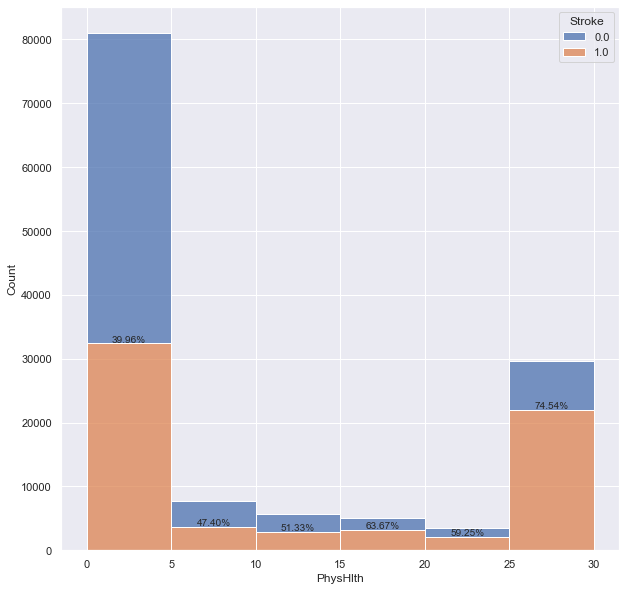

In [19]:
# physical illness or injury days in past 30 days scale 1-30
showHistPlot(stroke_data, 'PhysHlth',
             bins=6
             )

In [ ]:
# Do you have serious difficulty walking or climbing stairs?
# 0 = no
# 1 = yes
showCountPlot(stroke_data, 'DiffWalk')

# Feature Scaling

In [21]:
scaler = StandardScaler()
normalized_stroke_data = pd.DataFrame(scaler.fit_transform(stroke_data.drop(columns=['Stroke'])), columns=stroke_data.drop(columns=['Stroke']).columns)

normalized_stroke_data.head()

,Age,HighChol,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk
0,-1.981258,-1.266276,-0.640164,-0.199321,1.745657,-0.82599
1,1.049024,0.789717,-0.640164,-0.199321,-0.728857,-0.82599
2,1.427810,-1.266276,-0.640164,-1.923426,0.095981,-0.82599
3,0.670239,0.789717,-0.640164,-0.199321,-0.481406,-0.82599
4,-0.466117,-1.266276,-0.640164,-1.061374,-0.728857,-0.82599


In [22]:
X = normalized_stroke_data
y = stroke_data['Stroke']

# Data Splitting

in this section, we will split the data into 90% training set and 10% test set

In [ ]:
def get_metrics(model, X, y):
    k_fold = KFold(10, shuffle=True, random_state=1248)
    result = cross_validate(model, X, y, cv=k_fold, scoring=['accuracy', 'precision', 'recall', 'f1'])

    acc = result['test_accuracy'].mean()
    prec = result['test_precision'].mean()
    rec = result['test_recall'].mean()
    f1 = result['test_f1'].mean()

    return [acc, prec, rec, f1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1248)